# Lab 4. Text generation with deep learning

## Melnikov, Malysheva, Selivanovskaya

In [1]:
import sys
import os
import os.path
import random
import collections
import shutil
import time
import glob
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from math import pi
import scipy

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torch.autograd import Variable

import torchvision
from torchvision import transforms, datasets

%matplotlib inline

from bokeh.io import show,output_notebook
from bokeh.models import ColumnDataSource, HoverTool, LinearColorMapper, BasicTicker, PrintfTickFormatter,ColorBar
from bokeh.models import FuncTickFormatter
from bokeh.plotting import figure

output_notebook()

Loading BokehJS ...

**Задача:**

   Обучить character recurrent neural network (char RNN) на датасете статей arxiv, а также на своих данных и исследовать её свойства.

Определим структуру сети, в качестве основного блока используем **GRU**

In [2]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
    
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden

    def init_hidden(self):
        return torch.zeros(self.n_layers, 1, self.hidden_size)
    
    def save_model(model, filename='rnn.ckpt'):
        checkpoint = {'input_size': model.input_size,
                      'hidden_size': model.hidden_size,
                      'output_size': model.output_size,
                      'n_layers': model.n_layers,
                      'state_dict': model.state_dict()}
        with open(filename, 'wb') as f:
            torch.save(checkpoint, f)

    def load_model(filename):

        with open(filename, 'rb') as f:
            checkpoint = torch.load(f)

        model = RNN(input_size = checkpoint['input_size'], output_size = checkpoint['output_size'], hidden_size=checkpoint['hidden_size'], n_layers=checkpoint['n_layers'])
        model.load_state_dict(checkpoint['state_dict'])

        return model

## Считывание данных из файла

In [3]:
def DataLoader(filename):
    corpus = list()

    with open(filename, encoding='utf-8') as r_file:
        file_reader = csv.reader(r_file, delimiter = ",")
        count = 0
        for row in file_reader:
            if count != 0:
                line = row[7]
                line = line.replace('\n', ' ')
                corpus.append(line)
            count += 1
    return corpus

In [4]:
corpus_list = DataLoader('arxiv.csv') #list of all summary's
full_data = ' '.join(corpus_list) #merge all texts into one

## Пример реализации класса для получения данных из датасета

In [5]:
class TextDataset(Dataset):
    def __init__(self, text, chunk_len=10, chunks_number=100):
        self.chunks_number = chunks_number
        self.chunk_len = chunk_len
        self.text = text
        self.all_symbols = list({x for x in self.text})
    
    def __len__(self):
        return self.chunks_number
    
    def _get_tensor(self, text):
        return torch.LongTensor(list(map(self.all_symbols.index, text))).cuda()
    
    def _decode_vector(self, text):
        text = text.view(-1).cpu().numpy()
        if text.shape[0] == 1:
            text = list(text)
        return ''.join([self.all_symbols[x] for x in text])
    
    def _get_random_slice(self):
        start_index = random.randint(0, len(self.text) - self.chunk_len)
        end_index = start_index + self.chunk_len + 1
        return self.text[start_index:end_index]
    
    def __getitem__(self, idx):
        chunk = self._get_random_slice()
        return self._get_tensor(chunk[:-1]), self._get_tensor(chunk[1:])

In [6]:
arxiv_dataset = TextDataset(full_data)

In [7]:
unique_symbols = len(arxiv_dataset.all_symbols)
n_layers = 2
hidden_size = 100

In [8]:
unique_symbols

96

In [9]:
net = RNN(unique_symbols, hidden_size, unique_symbols, n_layers)

In [10]:
device = torch.device("cuda")

In [11]:
net = net.to(device)
optimizer = torch.optim.Adam(net.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss().cuda()

RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## Здесь нужно реализовать функцию для генерации текста с помощью сети

In [0]:
def generate(net, device, dataset, prime_str='А', predict_len=100, temperature=0.8):
    #Code to generate string based on input sequence (prime_str)

    return predicted_string

## Здесь должен быть цикл тренировки

In [0]:
epochs = 100

In [0]:
start = time.time()

for epoch in range(1, epochs+1):
    for inputs, targets in loader:
        #Your code for training here
print("Saving...")
RNN.save_model(net, "TrainedModel.ckpt")

In [0]:
net(inputs[0], hidden)[0].shape

torch.Size([1, 65])

In [0]:
targets[0]

tensor(46, device='cuda:0')

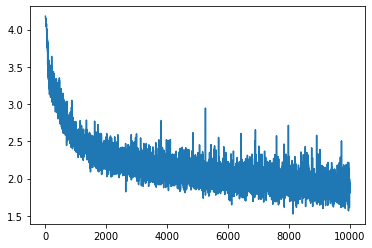

In [0]:
plt.figure()
plt.plot(all_losses)

## Результаты тренировки

In [0]:
print(generate(net, device, arxiv_dataset, 'In this research', 200 ), '\n')

## Здесь должны быть эксперименты с архитектурой и параметрами сети

## Здесь будет работа с вашими датасетами (которые вы захотите использовать)